In [1]:
from qserv_query import *

from drptools.data import DRPCatalogs
from drptools.data import DRPLoader
from drptools.data import QservNameConverter

In [2]:
#config = {"keys": {'deepCoadd_meas': ["*"],
#                   'deepCoadd_forced_src': ["*"],
#                   'deepCoadd_ref': ["*"],
#                   },
#          }
db = "qservTest_case175_qserv"
#convFileId_setup ="qservTest_case120_qserv"
#qservQueryCat=QservQueryCatalogs(dbName=db,convFileId=convFileId_setup,user="qsmaster", host="ccqserv125.in2p3.fr", port=30040)
qservQueryCat=QservQueryCatalogs(dbName=db, user="qsmaster", host="ccqserv125.in2p3.fr", port=30040)

In [3]:
col = qservQueryCat.describe_table('deepCoadd_ref')
col

input :  SHOW TABLES;
show tables;
iSelect :  None
{'paramList': None,
 'paramList_comp': None,
 'paramList_init': None,
 'patternList_init': None,
 'request': 'SHOW TABLES',
 'request_init': 'SHOW TABLES',
 'tables': None}
mysql -P 30040 -h ccqserv125.in2p3.fr -u qsmaster qservTest_case175_qserv -e "SHOW TABLES"
res/err :  None
['Tables_in_qservTest_case175_qserv']
[]
Names :  ['Tables_in_qservTest_case175_qserv']
Names - real :  ['Tables_in_qservTest_case175_qserv']
Types :  []
input :  DESCRIBE deepCoadd_ref;
describe deepcoadd_ref;
iSelect :  None
{'paramList': None,
 'paramList_comp': None,
 'paramList_init': None,
 'patternList_init': None,
 'request': 'DESCRIBE deepCoadd_ref',
 'request_init': 'DESCRIBE deepCoadd_ref',
 'tables': None}
mysql -P 30040 -h ccqserv125.in2p3.fr -u qsmaster qservTest_case175_qserv -e "DESCRIBE deepCoadd_ref"
res/err :  None
['Field', 'Type', 'Null', 'Key', 'Default', 'Extra']
[]
Names :  ['Field', 'Type', 'Null', 'Key', 'Default', 'Extra']
Names - rea

Field,Type,Null,Key,Default,Extra
str53,str53,str53,str53,str53,str53
id,bigint(20),NO,PRI,NULL,
patch,varchar(96),YES,,NULL,
tract,bigint(20),YES,,NULL,
coord_ra,double,YES,,NULL,
coord_dec,double,YES,,NULL,
parent,bigint(20),YES,,NULL,
merge_footprint_i,tinyint(1),YES,,NULL,
merge_footprint_r,tinyint(1),YES,,NULL,
merge_footprint_z,tinyint(1),YES,,NULL,


In [9]:
%%time
query = "SELECT id, coord_ra_deg, coord_dec_deg, patch, tract, modelfit_CModel_mag "
query += "FROM deepCoadd_ref as dr "
#query += "WHERE qserv_areaspec_box(55.2,-29.7,56.6,-28.4) "
#query += "WHERE qserv_areaspec_box(51.86, -29.75, 58.29, -26.95) "
query += "WHERE qserv_areaspec_box(51.79, -32.57, 58.33, -26.95) "
query += "AND dr.detect_isPrimary=1 "
query += "AND dr.modelfit_CModel_instFlux>0 " 
tab_ref=qservQueryCat.query(query, verbose=True)

Current query is
   SELECT id, coord_ra_deg, coord_dec_deg, patch, tract, modelfit_CModel_mag FROM deepCoadd_ref as dr WHERE qserv_areaspec_box(51.79, -32.57, 58.33, -26.95) AND dr.detect_isPrimary=1 AND dr.modelfit_CModel_instFlux>0 
input :  SELECT id,coord_ra_deg,coord_dec_deg,patch,tract,modelfit_CModel_mag FROM deepCoadd_ref as dr WHERE qserv_areaspec_box(51.79,-32.57,58.33,-26.95) AND dr.detect_isPrimary=1 AND dr.modelfit_CModel_instFlux>0 ;
select id,coord_ra_deg,coord_dec_deg,patch,tract,modelfit_cmodel_mag from deepcoadd_ref as dr where qserv_areaspec_box(51.79,-32.57,58.33,-26.95) and dr.detect_isprimary=1 and dr.modelfit_cmodel_instflux>0 ;
iSelect :  0
param names :  id,coord_ra_deg,coord_dec_deg,patch,tract,modelfit_CModel_mag
param list :  ('id', 'coord_ra_deg', 'coord_dec_deg', 'patch', 'tract', 'modelfit_CModel_mag')
pattern list :  None
table names :  deepCoadd_ref as dr
table names :  {'deepCoadd_ref': 'dr'}
param list - normal :  [('id', 'deepCoadd_ref', False, 'id')

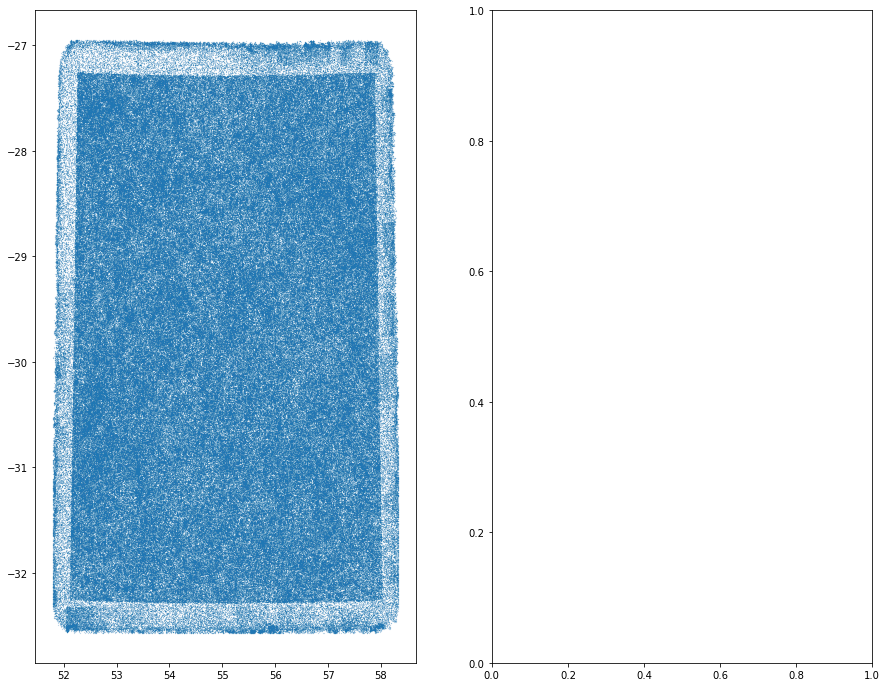

In [10]:
%matplotlib inline
import matplotlib.pylab as plt

cut = tab_ref["modelfit_CModel_mag"]<24
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 12))
_ = ax0.scatter(tab_ref["coord_ra_deg"][cut], tab_ref["coord_dec_deg"][cut], s=0.01)
#_ = ax1.scatter(tab_ref["tract"][cut], tab_ref["patch"][cut], s=0.01)
#_ = ax1.scatter(tab_all['modelfit_CModel_mag_1'][cut], tab_all['modelfit_CModel_mag_2'][cut], s=0.1)
#ax0.set_xlabel("mag(r) - mag(g)", fontsize=15)
#ax0.set_ylabel("mag(r) - mag(z)", fontsize=15)
#ax0.tick_params(labelsize=15)

In [22]:
import numpy as np

len(np.unique(tab_ref["patch"]))
np.unique(tab_ref["tract"])

4848
4849
4850
4851
4852
5062
5063
5064
5065
5066


In [4]:
%%time
query = "SELECT fs.id, fs.filter, fs.modelfit_CModel_mag, fs.modelfit_CModel_instFlux, fs.modelfit_CModel_instFluxErr "
query += "FROM deepCoadd_ref as dr, "
query += "deepCoadd_forced_src as fs "
#query += "WHERE qserv_areaspec_box(54.67,-29.74,56.36,-28.27) "  #tract 48550
# query += "WHERE qserv_areaspec_box(51.86, -29.75, 58.29, -26.95) "
query += "WHERE qserv_areaspec_box(51.79, -32.57, 58.33, -26.95) "
query += "AND dr.id=fs.id "
query += "AND dr.detect_isPrimary=1 "
query += "AND fs.base_ClassificationExtendedness_flag=0 "
query += "AND fs.base_ClassificationExtendedness_value <= 0.5 "
query += "AND fs.modelfit_CModel_flag=0 "
query += "AND fs.modelfit_CModel_instFlux>0 "
query += "AND (fs.modelfit_CModel_instFlux>40*fs.modelfit_CModel_instFluxErr) "
query += "AND fs.modelfit_CModel_mag BETWEEN 17 AND 23 "
tab_meas=qservQueryCat.query(query, verbose=True)

Current query is
   SELECT fs.id, fs.filter, fs.modelfit_CModel_mag, fs.modelfit_CModel_instFlux, fs.modelfit_CModel_instFluxErr FROM deepCoadd_ref as dr, deepCoadd_forced_src as fs WHERE qserv_areaspec_box(51.79, -32.57, 58.33, -26.95) AND dr.id=fs.id AND dr.detect_isPrimary=1 AND fs.base_ClassificationExtendedness_flag=0 AND fs.base_ClassificationExtendedness_value <= 0.5 AND fs.modelfit_CModel_flag=0 AND fs.modelfit_CModel_instFlux>0 AND (fs.modelfit_CModel_instFlux>40*fs.modelfit_CModel_instFluxErr) AND fs.modelfit_CModel_mag BETWEEN 17 AND 23 
input :  SELECT fs.id,fs.filter,fs.modelfit_CModel_mag,fs.modelfit_CModel_instFlux,fs.modelfit_CModel_instFluxErr FROM deepCoadd_ref as dr,deepCoadd_forced_src as fs WHERE qserv_areaspec_box(51.79,-32.57,58.33,-26.95) AND dr.id=fs.id AND dr.detect_isPrimary=1 AND fs.base_ClassificationExtendedness_flag=0 AND fs.base_ClassificationExtendedness_value <= 0.5 AND fs.modelfit_CModel_flag=0 AND fs.modelfit_CModel_instFlux>0 AND (fs.modelfit_CModel

In [5]:
tab_meas.group_by('id')

id,filter,modelfit_CModel_mag,modelfit_CModel_instFlux,modelfit_CModel_instFluxErr
int64,str21,float64,float64,float64
19478947997679620,z,20.5103,394.331,5.03812
19478947997679629,r,19.6866,842.104,4.08299
19478947997679629,y,17.934,4230.5,24.0059
19478947997679629,z,18.1563,3447.27,8.55356
19478947997679631,r,21.0833,232.632,2.34571
19478947997679631,y,19.5415,962.49,18.6756
19478947997679633,r,20.5902,366.377,2.67644
19478947997679633,y,18.6077,2274.59,19.8227
19478947997679638,r,19.9171,681.017,3.44111


In [ ]:
tab_meas['modelfit_CModel_instFluxErr']

In [6]:
%%time
filters = ['g', 'r', 'i']
tab = {}
for f in filters:
    cut = tab_meas['filter']==f
    tab[f] = tab_meas[cut]
    tab[f].rename_column("modelfit_CModel_mag","mag_" + f)

CPU times: user 122 ms, sys: 15.7 ms, total: 137 ms
Wall time: 136 ms


In [7]:
tabj = join(join(tab['g'], tab['r'], keys=("id")),tab['i'], keys=("id"))
tabj

id,filter_1,mag_g,modelfit_CModel_instFlux_1,modelfit_CModel_instFluxErr_1,filter_2,mag_r,modelfit_CModel_instFlux_2,modelfit_CModel_instFluxErr_2,filter,mag_i,modelfit_CModel_instFlux,modelfit_CModel_instFluxErr
int64,str21,float64,float64,float64,str21,float64,float64,float64,str21,float64,float64,float64
19478956587614237,g,19.9801,642.65,0.950911,r,18.7981,1908.81,0.944996,i,17.5778,5873.41,2.23825
19478956587614271,g,21.4749,162.199,0.702298,r,20.3197,470.017,0.558132,i,18.9043,1731.0,1.38393
19478956587614282,g,19.5674,939.838,1.26529,r,19.3084,1193.05,0.843116,i,19.2289,1283.68,1.26202
19478956587614295,g,21.9144,108.202,0.560799,r,20.7303,322.006,0.502715,i,19.6596,863.286,1.14172
19478956587614308,g,22.8185,47.0525,0.50507,r,22.2795,77.3046,0.385403,i,22.0801,92.8858,0.782494
19478956587614310,g,19.919,679.802,1.06474,r,19.5633,943.386,0.726088,i,19.4343,1062.34,1.27901
19478956587614311,g,20.011,624.613,1.01165,r,19.7732,777.568,0.658363,i,19.7065,826.821,1.04852
19478956587614312,g,22.0656,94.1348,0.605991,r,21.6697,135.553,0.394974,i,21.489,160.108,0.836144
19478956587614316,g,19.9892,637.291,1.10635,r,19.4968,1002.96,0.726564,i,19.2956,1207.13,1.20835


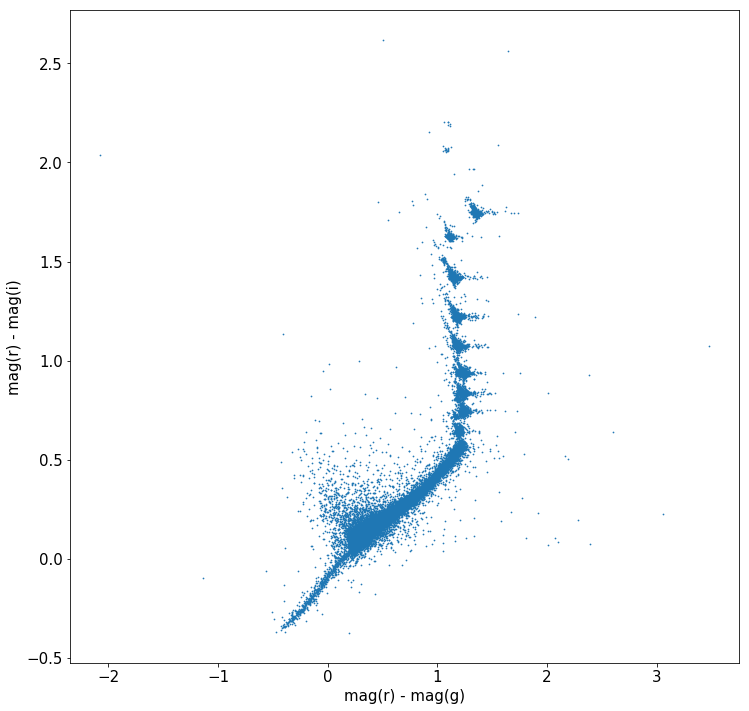

In [8]:
%matplotlib inline
import matplotlib.pylab as plt

fig, (ax0) = plt.subplots(ncols=1, figsize=(12, 12))
_ = ax0.scatter(tabj['mag_g']-tabj['mag_r'], tabj['mag_r']-tabj['mag_i'], s=0.5)
#_ = ax1.scatter(tab_all['modelfit_CModel_mag_1'][cut], tab_all['modelfit_CModel_mag_2'][cut], s=0.5)
ax0.set_xlabel("mag(r) - mag(g)", fontsize=15)
ax0.set_ylabel("mag(r) - mag(i)", fontsize=15)
ax0.tick_params(labelsize=15)

58840

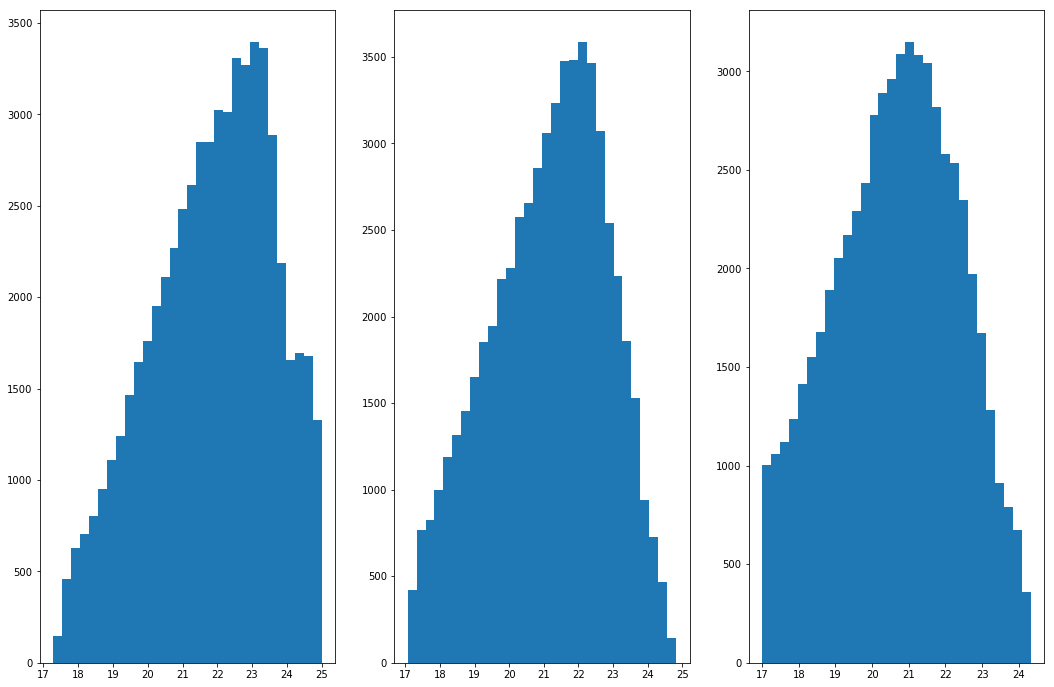

In [8]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(18, 12))
_ = ax0.hist(tabj["mag_g"], bins=30)
_ = ax1.hist(tabj["mag_r"], bins=30)
_ = ax2.hist(tabj["mag_i"], bins=30)
len(tabj)

In [ ]:
for i in range(len(col)):
    print(col['Field'][i])

In [ ]:
query = "SELECT filter FROM deepCoadd_meas"
tab = qservQueryCat.query(query, verbose=True)
tab

In [ ]:
query = "SELECT tract,patch,coord_ra,coord_dec FROM deepCoadd_ref WHERE detect_isPrimary=1 LIMIT 100"
tab = qservQueryCat.query(query, verbose=True)
tab

In [ ]:
filters = ['g', 'r', 'z']
tab = {}

for f in filters:
    query = "SELECT id,filter FROM deepCoadd_meas as dm WHERE "
    query += "AND dm.tract=4851 "
    query += "AND dm.base_ClassificationExtendedness_flag=0 "
    query += "AND dm.base_ClassificationExtendedness_value <= 0.5 "
    #query += "AND dm.ext_shapeHSM_HsmShapeRegauss_flag=0 "
    query += "AND dm.detect_isPrimary=1 "
    query += "AND dm.filter=" + "'" + f + "'"
    print(query)
    tab_meas=qservQueryCat.query(query, verbose=False)

    query = "SELECT [objectId,filter,modelfit_CModel_flux,modelfit_CModel_fluxSigma,modelfit_CModel_mag,modelfit_CModel_magSigma] FROM deepCoadd_forced_src as dfs WHERE "
    query += "AND dfs.tract=4851 "
    query += "AND dfs.modelfit_CModel_flux>0 "
    query += "AND dfs.modelfit_CModel_flag=0 "
    query += "AND (dfs.modelfit_CModel_flux/dfs.modelfit_CModel_fluxSigma)>10 "
    query += "AND dfs.filter=" + "'" + f + "'"
    print(query)
    tab_forced=qservQueryCat.query(query, verbose=False)

    tab[f] = join(tab_meas,tab_forced,keys=("id","filter"))

In [ ]:
f = 'r'
query = "SELECT id,filter FROM deepCoadd_meas as dm WHERE "
query += "dm.tract=4851 "
query += "AND dm.base_ClassificationExtendedness_flag=0 "
query += "AND dm.base_ClassificationExtendedness_value <= 0.5 "
query += "AND dm.detect_isPrimary=1 "
query += "AND dm.filter=" + "'" + f + "' LIMIT 100"
print(query)
tab_meas=qservQueryCat.query(query, verbose=False)

In [ ]:
tab_meas

In [ ]:
query = "SELECT tract,patch,coord_ra,coord_dec FROM deepCoadd_ref WHERE detect_isPrimary=1 LIMIT 100"
tab = qservQueryCat.query(query, verbose=True)

In [ ]:
tab_all = join(tab[filters[0]], tab[filters[1]], keys=("id"))
tab_all = join(tab_all, tab[filters[2]], keys=("id"))
print(len(tab_all))

In [ ]:
tab_all

In [ ]:
tab['z']

In [ ]:
query = "SELECT id,filter,modelfit_CModel_flux,modelfit_CModel_fluxSigma,modelfit_CModel_mag,modelfit_CModel_magSigma FROM deepCoadd_meas as dm WHERE "
query += "AND dm.base_ClassificationExtendedness_flag=0 "
query += "AND dm.base_ClassificationExtendedness_value <= 0.5 "
#query += "AND dm.ext_shapeHSM_HsmShapeRegauss_flag=0 "
query += "AND dm.detect_isPrimary=1 "
query += "AND dm.filter='r' "

#query += "INNER JOIN deepCoadd_forced_src ON dm.id = deepCoadd_forced_src.objectId "
tab_meas_r=qservQueryCat.query(query, verbose=False)

In [ ]:
query = "SELECT dm.id, dm.filter, dm.modelfit_CModel_mag, fs.modelfit_CModel_mag "
query += "FROM deepCoadd_meas as dm, "
query += "deepCoadd_forced_src as fs "
query += "WHERE dm.id=fs.id "
query += "AND dm.detect_isPrimary=1 "
query += "AND dm.tract=4851 "
query += "AND dm.modelfit_CModel_mag<21 "
tab_meas_r=qservQueryCat.query(query, verbose=True)

In [ ]:
query = "SELECT id, filter, modelfit_CModel_mag"
query += "FROM deepCoadd_meas as dm "
query += "WHERE dm.tract=4851 AND dm.modelfit_CModel_mag<21 " 
query += "LIMIT 100"
tab_meas_r=qservQueryCat.query(query, verbose=True)

In [ ]:
query = "SELECT id, filter, modelfit_CModel_mag"
query += "FROM deepCoadd_meas as dm "
query += "WHERE dm.tract=4851 AND dm.modelfit_CModel_mag<21 " 
query += "LIMIT 100"
tab_meas_r=qservQueryCat.query(query, verbose=True)

In [ ]:
query = "SELECT deepCoadd_meas.id, deepCoadd_meas.filter, deepCoadd_meas.modelfit_CModel_mag, deepCoadd_forced_src.modelfit_CModel_mag"
query += "FROM deepCoadd_meas "
query += "INNER JOIN deepCoadd_forced_src ON deepCoadd_meas.id = deepCoadd_forced_src.id "
query += "WHERE deepCoadd_meas.tract=4851 AND deepCoadd_meas.modelfit_CModel_mag<21 " 
query += "LIMIT 100"
tab_meas_r=qservQueryCat.query(query, verbose=True)

In [ ]:
SELECT s.ra, s.decl, o.raRange, o.declRange
FROM   Object o,
       Source s
WHERE  o.objectId = <theId>
  AND  o.objectId = s.objectId

In [ ]:
set(tab_meas_r['filter'])

In [ ]:
tab_meas_r

In [ ]:
query = "SELECT [objectId,filter,modelfit_CModel_flux,modelfit_CModel_fluxSigma,modelfit_CModel_mag,modelfit_CModel_magSigma] FROM deepCoadd_forced_src as dfs WHERE "
query += "AND dfs.modelfit_CModel_flux>0 "
query += "AND dfs.modelfit_CModel_flag=0 "
query += "AND (dfs.modelfit_CModel_flux/dfs.modelfit_CModel_fluxSigma)>10 "
query += "AND dfs.filter='r' "
tab_forced_r=qservQueryCat.query(query, verbose=False)

In [ ]:
tab_forced_r

In [ ]:
tab_forced_r.rename_column("objectId","id")
tab_r = join(tab_meas_r,tab_forced_r,keys=("id","filter"))

In [ ]:
tabf = {}
tabf['r'] = join(tab_meas_r,tab_forced_r,keys=("id","filter"))

In [ ]:
tabf['r']

In [ ]:
query = "SELECT [id,filter,modelfit_CModel_flux,modelfit_CModel_fluxSigma,modelfit_CModel_mag,modelfit_CModel_magSigma] FROM deepCoadd_meas as dm WHERE "
query += "AND dm.base_ClassificationExtendedness_flag=0 "
query += "AND dm.base_ClassificationExtendedness_value <= 0.5 "
#query += "AND dm.ext_shapeHSM_HsmShapeRegauss_flag=0 "
query += "AND dm.detect_isPrimary=1 "
query += "AND dm.filter='z' "
tab_meas_z=qservQueryCat.query(query, verbose=False)

In [ ]:
tab1 = join(tab_meas_r, tab_meas_g, keys=("id"))
tab_all = join(tab1, tab_meas_z, keys=("id"))

In [ ]:
tab_all

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt

In [ ]:
cut = (tab_all['modelfit_CModel_mag_1']> 15) & (tab_all['modelfit_CModel_mag_2'] > 15) & (tab_all['modelfit_CModel_mag'] > 15)
#cut &= (tab_all['modelfit_CModel_mag_1'] < 24) & (tab_all['modelfit_CModel_mag_2'] < 24) 
#cut &= (tab_all['modelfit_CModel_flux_1'] / tab_all['modelfit_CModel_fluxSigma_1'] > 10)
#cut &= (tab_all['modelfit_CModel_flux_2'] / tab_all['modelfit_CModel_fluxSigma_2'] > 10)
fig, (ax0) = plt.subplots(ncols=1, figsize=(12, 12))
_ = ax0.scatter(tab_all['modelfit_CModel_mag_1'][cut] - tab_all['modelfit_CModel_mag'][cut], tab_all['modelfit_CModel_mag_1'][cut]-tab_all['modelfit_CModel_mag_2'][cut], s=0.1)
#_ = ax1.scatter(tab_all['modelfit_CModel_mag_1'][cut], tab_all['modelfit_CModel_mag_2'][cut], s=0.5)
ax0.set_xlabel("mag(r) - mag(g)", fontsize=15)
ax0.set_ylabel("mag(r) - mag(z)", fontsize=15)
ax0.tick_params(labelsize=15)
plt.savefig('qserv_colorPlot.png')

In [ ]:
query = "SELECT id, detect_isPrimary FROM deepCoadd_meas"
tab_ref=qservQueryCat.query(query, verbose=True)

In [ ]:
query = "SELECT id FROM deepCoadd_ref"
tab_ref=qservQueryCat.query(query, verbose=True)

In [ ]:
tab_ref

In [ ]:
%%time
query = "SELECT id, coord_ra_deg, coord_dec_deg, patch, tract, modelfit_CModel_mag "
query += "FROM deepCoadd_ref as dr "
query += "WHERE qserv_areaspec_box(51.79, -32.57, 58.33, -26.95) "
12.59 65.19 -37.86
query += "AND dr.detect_isPrimary=1 "
query += "AND dr.modelfit_CModel_instFlux>0 " 
tab_ref=qservQueryCat.query(query, verbose=True)

In [16]:
query = "SELECT fs.id, fs.filter, fs.modelfit_CModel_mag, fs.modelfit_CModel_instFlux, fs.modelfit_CModel_instFluxErr "
query += "FROM deepCoadd_ref as dr, "
query += "deepCoadd_forced_src as fs "
query += "WHERE qserv_areaspec_box(54.67,-29.74,56.36,-28.27) "  #tract 48550
query += "AND dr.id=fs.id "
query += "AND dr.detect_isPrimary=1 "

tab=qservQueryCat.query(query, verbose=True)

Current query is
   SELECT fs.id, fs.filter, fs.modelfit_CModel_mag, fs.modelfit_CModel_instFlux, fs.modelfit_CModel_instFluxErr FROM deepCoadd_ref as dr, deepCoadd_forced_src as fs WHERE qserv_areaspec_box(54.67,-29.74,56.36,-28.27) AND dr.id=fs.id AND dr.detect_isPrimary=1 
input :  SELECT fs.id,fs.filter,fs.modelfit_CModel_mag,fs.modelfit_CModel_instFlux,fs.modelfit_CModel_instFluxErr FROM deepCoadd_ref as dr,deepCoadd_forced_src as fs WHERE qserv_areaspec_box(54.67,-29.74,56.36,-28.27) AND dr.id=fs.id AND dr.detect_isPrimary=1 ;
select fs.id,fs.filter,fs.modelfit_cmodel_mag,fs.modelfit_cmodel_instflux,fs.modelfit_cmodel_instfluxerr from deepcoadd_ref as dr,deepcoadd_forced_src as fs where qserv_areaspec_box(54.67,-29.74,56.36,-28.27) and dr.id=fs.id and dr.detect_isprimary=1 ;
iSelect :  0
param names :  fs.id,fs.filter,fs.modelfit_CModel_mag,fs.modelfit_CModel_instFlux,fs.modelfit_CModel_instFluxErr
param list :  ('fs.id', 'fs.filter', 'fs.modelfit_CModel_mag', 'fs.modelfit_CModel

ValueError: could not convert string to float: 'NULL'

In [ ]:
%%time
query = "SELECT fs.id, fs.filter, fs.modelfit_CModel_mag, fs.modelfit_CModel_instFlux, fs.modelfit_CModel_instFluxErr "
query += "FROM deepCoadd_ref as dr, "
query += "deepCoadd_forced_src as fs "
#query += "WHERE qserv_areaspec_box(54.67,-29.74,56.36,-28.27) "  #tract 48550
# query += "WHERE qserv_areaspec_box(51.86, -29.75, 58.29, -26.95) "
query += "WHERE qserv_areaspec_box(51.79, -32.57, 58.33, -26.95) "
query += "AND dr.id=fs.id "
query += "AND dr.detect_isPrimary=1 "
query += "AND fs.base_ClassificationExtendedness_flag=0 "
query += "AND fs.base_ClassificationExtendedness_value <= 0.5 "
query += "AND fs.modelfit_CModel_flag=0 "
query += "AND fs.modelfit_CModel_instFlux>0 "
query += "AND (fs.modelfit_CModel_instFlux>40*fs.modelfit_CModel_instFluxErr) "
query += "AND fs.modelfit_CModel_mag BETWEEN 17 AND 23 "
tab_meas=qservQueryCat.query(query, verbose=True)